# Bagging

revision: 78571a2

In [1]:
# @formatter:off
# PREAMBLE

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

from mlis.arrays import asinput, aslabel

%matplotlib inline
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
%load_ext autoreload
%autoreload 2
# @formatter:on

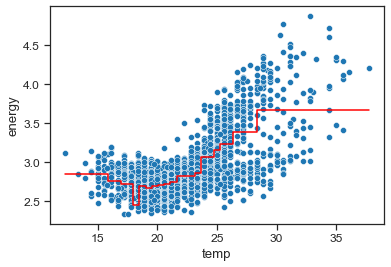

In [2]:
# we will not implement a decision tree regressor again, but use the one from sklearn
def tree_base_learner(X, y):
    # wrap sklearn
    tree = DecisionTreeRegressor(min_samples_split=.1)
    tree.fit(asinput(X), aslabel(y))
    # return the decision tree model
    h = lambda Z: tree.predict(asinput(Z))
    return h


# load data
df = pd.read_csv('energy.csv', sep=' ')
X = asinput(df['temp'])
y = aslabel(df['energy'])
t = np.linspace(X.min(), X.max())

# fit a decision tree regressor
h = tree_base_learner(X, y)

# plot data
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, x='temp', y='energy', data=df)
ax.plot(t, h(t), 'r', drawstyle='steps-pre')

In [15]:
# Open bagging.py and implement the function bootstrap

from mlis.ensembles.bagging import bootstrap

rng = np.random.RandomState(1)  # fix rng
X_boot, y_boot = bootstrap(X, y, rng)

np.testing.assert_equal(X_boot.shape, X.shape)
np.testing.assert_equal(y_boot.shape, y.shape)
for xi, yi in zip(X_boot, y_boot):
    assert xi in X
    assert yi in y

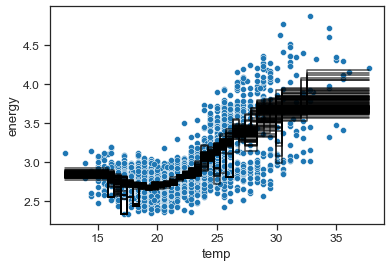

In [16]:
def fit_ensemble(X, y, base_learner, T, rng):
    """
    fit an ensemble to the data
    @param X: m by 1 array of inputs
    @param y: m by 1 array of labels
    @param base_learner: The base learner
    @param T: Ensemble size / number of base learner
    @param rng: numpy RandomState instance.
    @return: A collection of fitted base_learner
    """
    ensemble = [base_learner(*bootstrap(X, y, rng)) for _ in range(T)]
    return ensemble


# learn ensemble
rng = np.random.RandomState(1)
ensemble = fit_ensemble(X, y, tree_base_learner, 100, rng)

# plot data
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, x='temp', y='energy', data=df)

# plot individual trees
for tree in ensemble:
    ax.plot(t, tree(t), 'k', alpha=0.7, drawstyle='steps-pre')

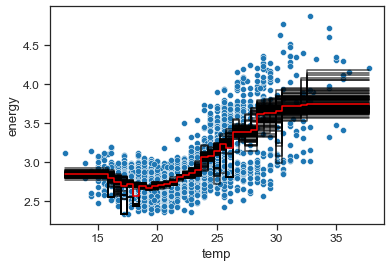

In [22]:
# Open bagging.py and implement the ensemble_predict

from mlis.ensembles.bagging import ensemble_predict

X = asinput(df['temp'])
y = aslabel(df['energy'])
t = np.linspace(X.min(), X.max())

# learn ensemble
rng = np.random.RandomState(1)
ensemble = fit_ensemble(X, y, tree_base_learner, 100, rng)
# make prediction
yhat = ensemble_predict(t, ensemble)
# plot data
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, x='temp', y='energy', data=df)
# plot individual trees
for tree in ensemble:
    ax.plot(t, tree(t), 'k', alpha=0.7, drawstyle='steps-pre')
# plot ensemble prediction
ax.plot(t, yhat, 'r', drawstyle='steps-pre')